# Analysis of Assumptions - Uber Speeds

In [53]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [8]:
df = pd.read_csv("2019-Jan-Daily-Aggregated.csv", index_col = 0)

In [12]:
df["date"] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)

In [13]:
df["date"]= pd.to_datetime(df["date"])

In [37]:
week_days = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

In [44]:
df["day_of_week"] = df['date'].dt.dayofweek

In [16]:
df

,year,month,day,speed_mph_mean,speed_mph_stddev,date,day_of_week
1,2019,1,1,33.352492,5.693520,2019-01-01,1
2,2019,1,2,32.470983,6.094921,2019-01-02,2
3,2019,1,3,30.309660,6.102640,2019-01-03,3
4,2019,1,4,30.567950,5.996863,2019-01-04,4
5,2019,1,5,31.478367,5.680409,2019-01-05,5
6,2019,1,6,32.935633,5.693706,2019-01-06,6
7,2019,1,7,31.106664,6.191277,2019-01-07,0
8,2019,1,8,29.149109,6.209379,2019-01-08,1
9,2019,1,9,28.806124,6.200961,2019-01-09,2
10,2019,1,10,29.455230,6.154581,2019-01-10,3


In [45]:
std_dev = {}
for day in range(7):
    std_dev[week_days[day]] = (df[df["day_of_week"] == day]["speed_mph_mean"].std()) 
    
std_dev

{'Monday': 0.8400302145066592,
 'Tuesday': 1.8499899558915731,
 'Wednesday': 1.4401400065659806,
 'Thursday': 0.5592226400623584,
 'Friday': 0.876254243383524,
 'Saturday': 0.585703205863367,
 'Sunday': 0.3791642878625216}

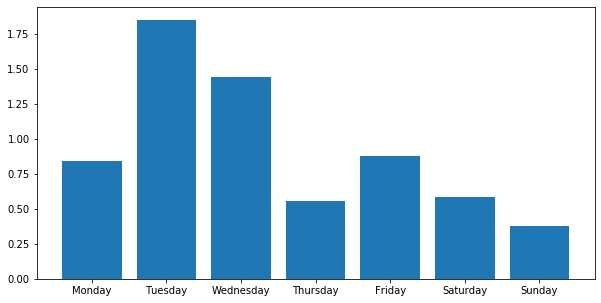

In [54]:
plt.bar(range(len(std_dev)), list(std_dev.values()), align='center')
plt.xticks(range(len(std_dev)), list(std_dev.keys()))
plt.show()

In [47]:
dayofweek_dic = {}
for day in range(7):
    dayofweek_dic[week_days[day]] = df[df["day_of_week"] == day]["speed_mph_mean"].tolist()

In [56]:
dayofweek_dic

{'Monday': [31.106663745956997,
  30.1257041594114,
  31.985811680743605,
  30.3560446501166],
 'Tuesday': [33.3524922190605,
  29.1491090636302,
  29.516259351592804,
  28.9464527721772,
  29.3641945270432],
 'Wednesday': [32.4709829468889,
  28.8061240674677,
  29.448958440555,
  29.411125366013398,
  29.648289798090897],
 'Thursday': [30.309660125803298,
  29.455229611607198,
  28.7626709687426,
  29.3544240533038,
  29.2704918764756],
 'Friday': [30.5679496367312,
  29.3832786264399,
  28.731762769565897,
  28.6889896292169],
 'Saturday': [31.4783667546736,
  30.2894584075379,
  30.424327245380503,
  30.238673090093698],
 'Sunday': [32.9356325814184,
  32.145196934218,
  32.1184303729462,
  32.383898342347194]}

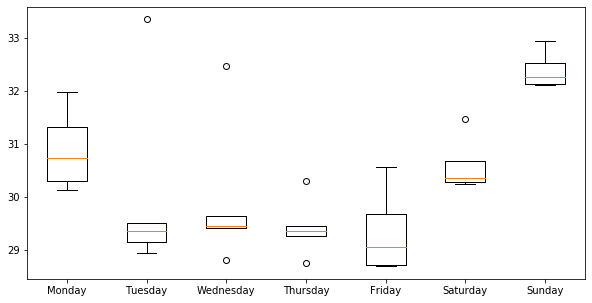

In [55]:
# or backwards compatable    
labels, data = dayofweek_dic.keys(), dayofweek_dic.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()